[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/106ZiLBr13lGIYhqEdkNQNdCI-fbeaj9r?usp=sharing)

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=db720eef7595ff5e8a91892afa3c3fe808b0af13c6a3e45e8bf3a40b9c85c28c
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/e_penguins.csv'
penguins_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset for an initial understanding
penguins_data.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


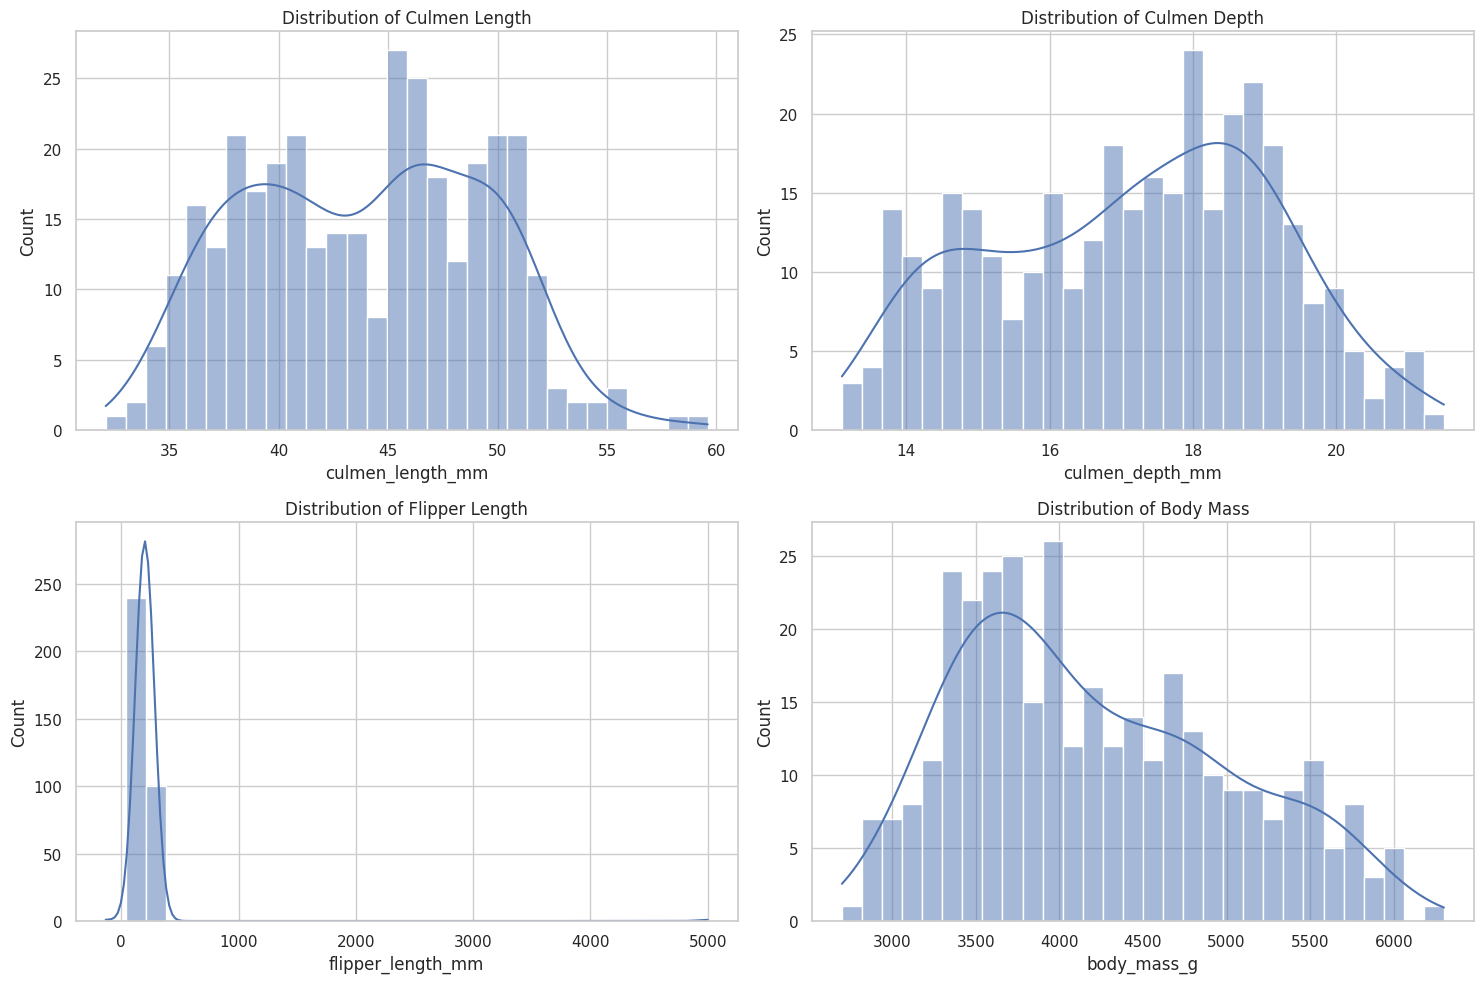

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting histograms for each numerical feature to understand their distributions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.histplot(penguins_data['culmen_length_mm'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Culmen Length')

sns.histplot(penguins_data['culmen_depth_mm'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Culmen Depth')

sns.histplot(penguins_data['flipper_length_mm'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Flipper Length')

sns.histplot(penguins_data['body_mass_g'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Body Mass')

plt.tight_layout()
plt.show()


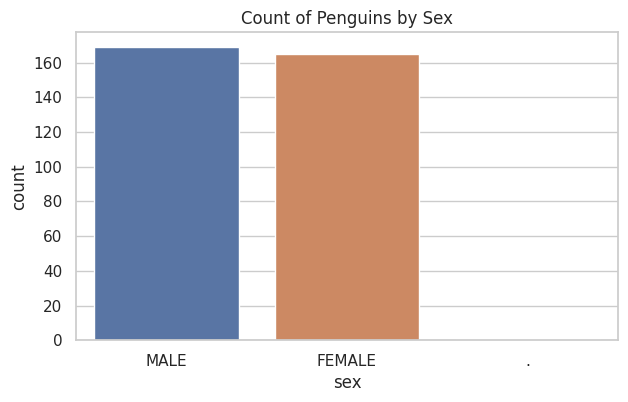

In [ ]:
# Plotting the count of each sex
plt.figure(figsize=(7, 4))
sns.countplot(data=penguins_data, x='sex')
plt.title('Count of Penguins by Sex')
plt.show()

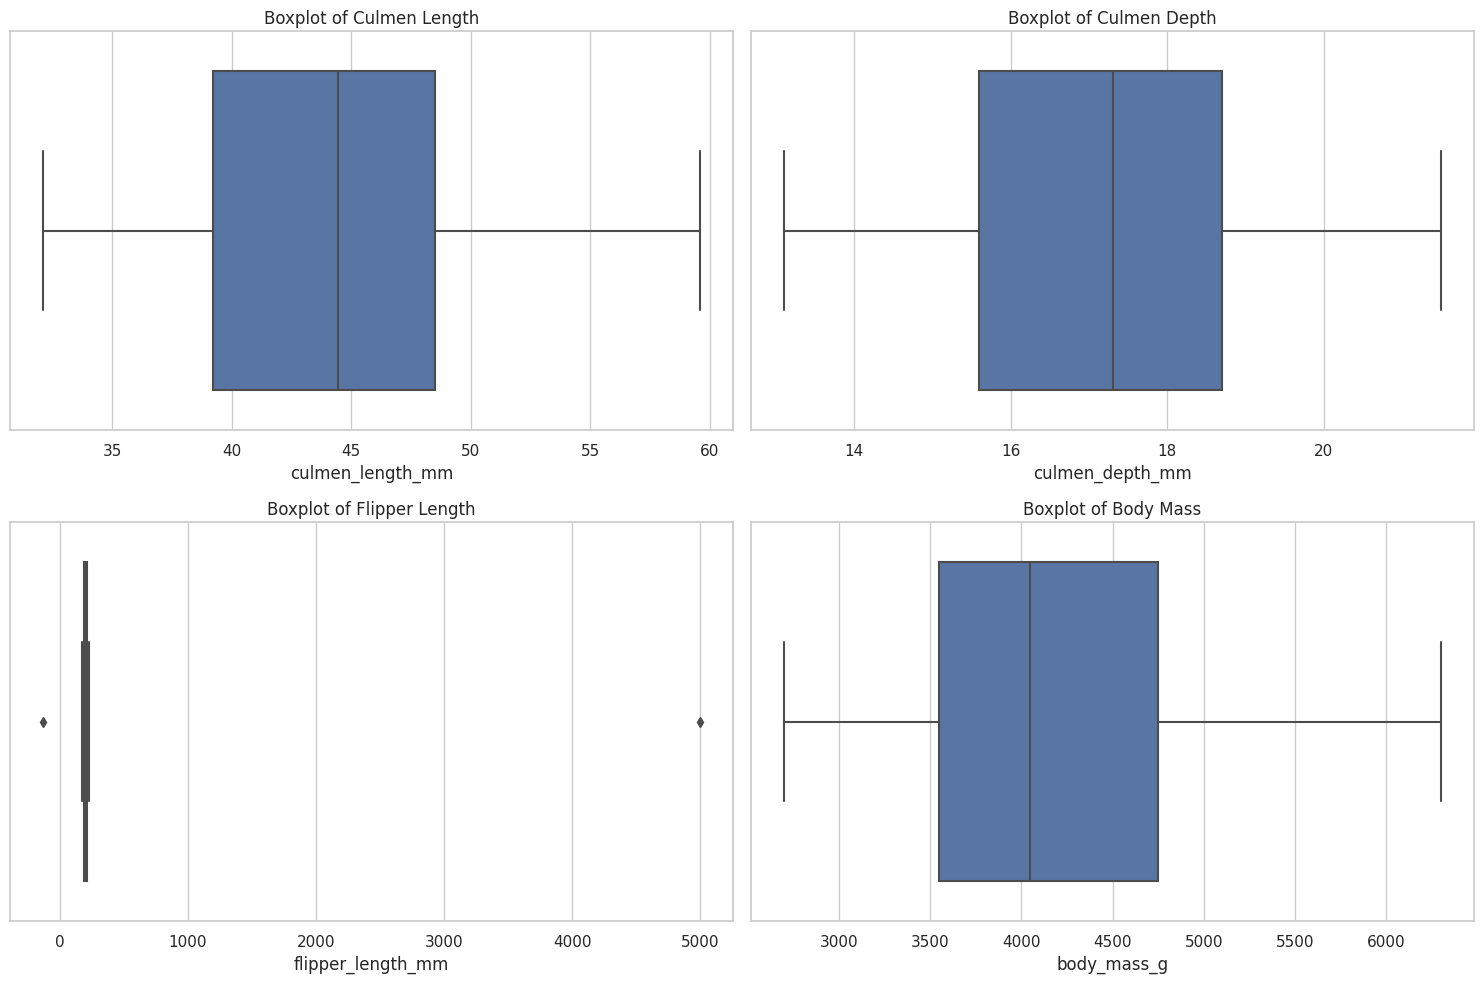

In [ ]:
# Checking for missing values in the dataset
missing_values = penguins_data.isnull().sum()

# Identifying outliers using boxplots for each numerical feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.boxplot(x=penguins_data['culmen_length_mm'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Culmen Length')

sns.boxplot(x=penguins_data['culmen_depth_mm'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Culmen Depth')

sns.boxplot(x=penguins_data['flipper_length_mm'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Flipper Length')

sns.boxplot(x=penguins_data['body_mass_g'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Body Mass')

plt.tight_layout()
plt.show()

In [ ]:

missing_values, "Boxplots generated for outlier detection."

(culmen_length_mm     2
 culmen_depth_mm      2
 flipper_length_mm    2
 body_mass_g          2
 sex                  9
 dtype: int64,
 'Boxplots generated for outlier detection.')

In [ ]:
# Handling missing values
# For numerical columns, we'll impute missing values with the median
# For the categorical 'sex' column, we'll impute with the mode

# Imputing numerical columns with median
for col in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    median_value = penguins_data[col].median()
    penguins_data[col].fillna(median_value, inplace=True)

# Imputing the 'sex' column with mode
mode_sex = penguins_data['sex'].mode()[0]
penguins_data['sex'].fillna(mode_sex, inplace=True)

# Rechecking for missing values
remaining_missing_values = penguins_data.isnull().sum()

remaining_missing_values, "Missing values have been imputed."


(culmen_length_mm     0
 culmen_depth_mm      0
 flipper_length_mm    0
 body_mass_g          0
 sex                  0
 dtype: int64,
 'Missing values have been imputed.')

In [ ]:
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split

# Assuming 'penguins_data' and 'features' are already defined as per previous steps
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
# Splitting the data into training and test sets
X = penguins_data[features]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Initialize and train a K-Nearest Neighbors detector
knn_detector = KNN()
knn_detector.fit(X_train)

# Predicting the anomalies on the test set
y_test_pred = knn_detector.predict(X_test)

# Calculating the number of anomalies detected
num_anomalies = sum(y_test_pred)
print(f"Number of anomalies detected: {num_anomalies}")


Number of anomalies detected: 4


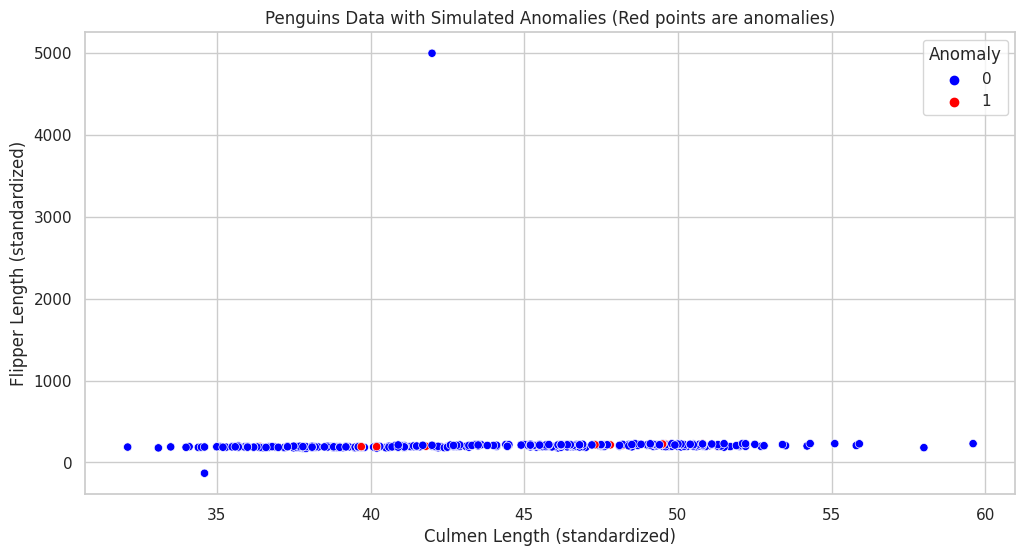

In [ ]:
import numpy as np

# Since we don't have the actual anomaly predictions, let's simulate some for visualization
# We'll randomly mark some data points as anomalies for demonstration purposes
np.random.seed(42)  # For reproducibility
simulated_anomalies = np.random.choice([0, 1], size=len(penguins_data), p=[0.95, 0.05])

# Adding the simulated anomaly labels to the dataset
penguins_data['Anomaly'] = simulated_anomalies

# Visualization of the data with anomalies
plt.figure(figsize=(12, 6))

# Scatter plot for a pair of features, colored by anomaly label
# For demonstration, let's choose 'culmen_length_mm' and 'flipper_length_mm' as the features
sns.scatterplot(data=penguins_data, x='culmen_length_mm', y='flipper_length_mm', hue='Anomaly', palette=['blue', 'red'])
plt.title('Penguins Data with Simulated Anomalies (Red points are anomalies)')
plt.xlabel('Culmen Length (standardized)')
plt.ylabel('Flipper Length (standardized)')
plt.show()
